In [1]:
import numpy as np
from PIL import Image as Im
from PIL import ImageOps
from matplotlib import pyplot as plt
import matplotlib as mpl

/home/gabriel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
pathimg = "/home/gabriel/Desktop/ProjectFiles/ColloidalMembranes/CodeMega/DataAnalysis/Round9/FinalSnapshot"
pathPC = "/home/gabriel/Desktop/ProjectFiles/ColloidalMembranes/CodeMega/DataAnalysis/Round9"

In [17]:

qs = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1]
gs = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
f = 0.05

C = 2


In [18]:

# must have rows * columns number of images
def combine_images(rows, columns, space, images, xlabels, ylabels):
    scalefactor = 1/2
    height_max = max([int(Im.open(image).height*scalefactor) for image in images])
    width_max = height_max
    background_width = int(width_max*columns + (space*columns)-space)
    background_height = int(height_max*rows + (space*rows)-space)
    background = Im.new('RGBA', (background_width, background_height), (255, 255, 255, 255))
    x = 0
    y = 0
    for i, image in enumerate(images):
        snapshot = Im.open(image)
        
        # cropping out the margins and adding a frame
        width, height = snapshot.size
        cropsquare = height/20
        left = int(width/2 - height/2 + cropsquare)
        top = int(cropsquare)
        right = int(width/2 + height/2 - cropsquare)
        bottom = int(height - cropsquare)
        snapshotc = snapshot.crop((left, top, right, bottom))

        snapshotcf = ImageOps.expand(snapshotc, border=2)
        snapshotcrf = snapshotcf.resize((int(width_max), int(height_max)))


        x_offset = int((width_max-snapshotcrf.width)/2)
        y_offset = int((height_max-snapshotcrf.height)/2)
        background.paste(snapshotcrf, (x+x_offset, y+y_offset))
        x += width_max + space
        if (i+1) % columns == 0:
            y += height_max + space
            x = 0
    # Region 1
    # fig = plt.figure(figsize=(13, 7))
    
    # Region 2
    fig = plt.figure(figsize=(13, 10),constrained_layout=True)

    fig.suptitle("p$^*$ = "+str(f), fontsize=20)
    gspec = fig.add_gridspec(1,3, width_ratios= [1, 60, 2])
    ax1 = fig.add_subplot(gspec[0,0], frameon=False, facecolor='white')
    ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax2 = fig.add_subplot(gspec[0,1])
    ax2.imshow(np.asarray(background))
    ax3 = fig.add_subplot(gspec[0,2], frameon=True, facecolor='white')
    ax3.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

    fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap='viridis'),
             cax=ax3, orientation='vertical')
    ax3.set_aspect(10)
    ax3.set_title(r"$\hat{\bf{n}}_y$"+"\n", fontsize = 18)
    ax2.set_xlabel("q$^*$", fontsize = 18)
    ax1.set_ylabel("$\gamma^*$", fontsize = 18, rotation = 0)
    # Region 1
    # ax2.set_yticks(np.linspace(0.5*height_max, 9.5*height_max, 7), labels=np.around(np.linspace(0.1, 0.7, 7)[::-1],decimals=2), rotation = 0)
    # ax2.set_xticks(np.linspace(0.5*width_max, 19.5*width_max, 14), labels=np.around(np.linspace(0.0, 1.3, 14),decimals=2))
    
    # Region 2
    # ax2.set_yticks(np.linspace(0.5*height_max, 9.5*height_max, 7), labels=np.around(np.linspace(0.5, 1.1, 7)[::-1],decimals=2), rotation = 0)
    # ax2.set_xticks(np.linspace(0.5*width_max, 9.5*width_max, 7), labels=np.around(np.linspace(0.0, 0.6, 7),decimals=2))

    # Region 3
    ax2.set_yticks(np.linspace(0.5*height_max, (len(ylabels)-0.5)*height_max, len(ylabels)), labels=reversed(ylabels), rotation = 0)
    ax2.set_xticks(np.linspace(0.5*width_max, (len(xlabels)-0.5)*width_max, len(xlabels)), labels=xlabels)

    # plt.tight_layout()

    plt.savefig(pathPC+f"/PoreCollagefullP={f/2}.png", dpi = 400, facecolor='white', bbox_inches='tight')

    return fig, ax1, ax2

In [19]:

for i, gg in enumerate(gs):
        for j, qq in enumerate(qs):
            gg = round(gg, ndigits = 2)
            qq = round(qq, ndigits = 2)
            
            if gg==0.0 or gg==1.0 or gg==2.0: gs[i] = round(gg)
            if qq==0.0 or qq==1.0 or qq==2.0: qs[j] = round(qq)

437


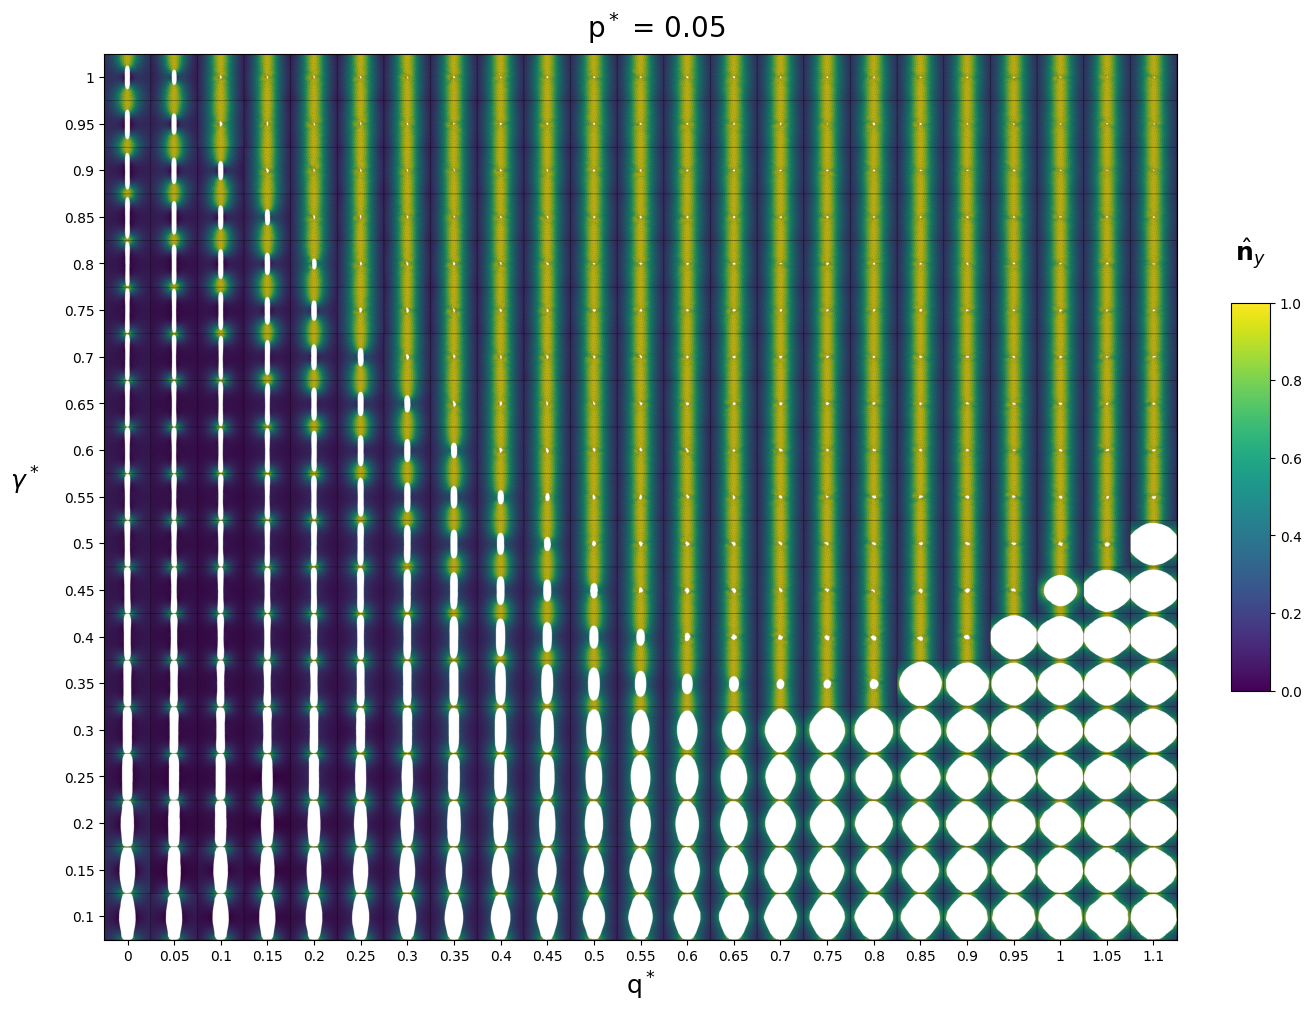

In [20]:

imgnames = np.flip(np.array([[pathimg+"/SinglePoreg"+str(gg)+"p"+str(f)+"q"+str(qq)+".png" for qq in qs] for gg in gs]), axis=0).flatten()
print(imgnames.size)
fig, ax1, ax2 = combine_images(rows = len(gs), columns=len(qs), space=0, images=imgnames, xlabels = qs, ylabels = gs)